<a href="https://colab.research.google.com/github/CrushedKatana/PCVK/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
from  google.colab import drive

# Accessing  My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


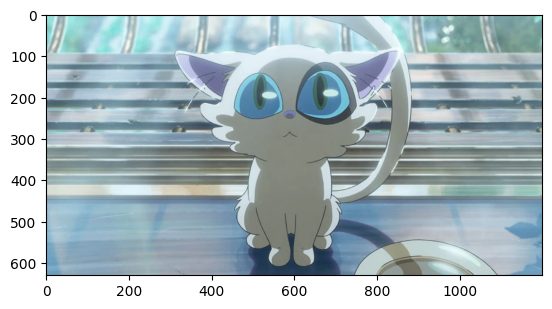

In [124]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
plt.imshow(img) #perhatikan hasilnya adalah citra dgn channel

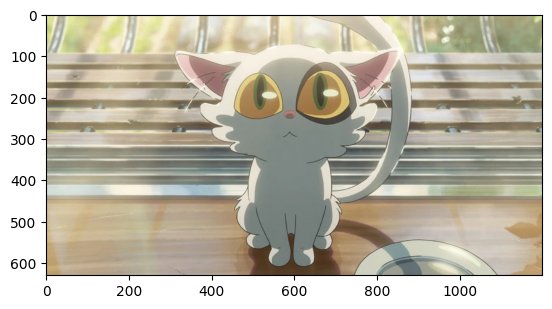

In [125]:
img2 =  img
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img3)

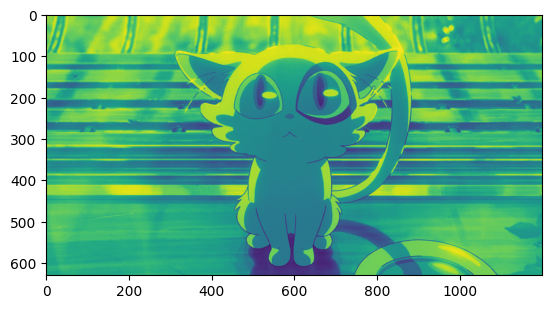

In [126]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

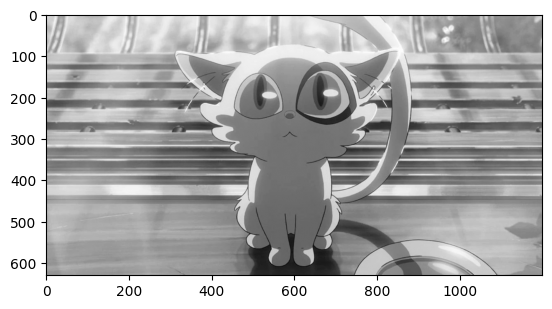

In [127]:
plt.imshow(img_gray, cmap='gray')

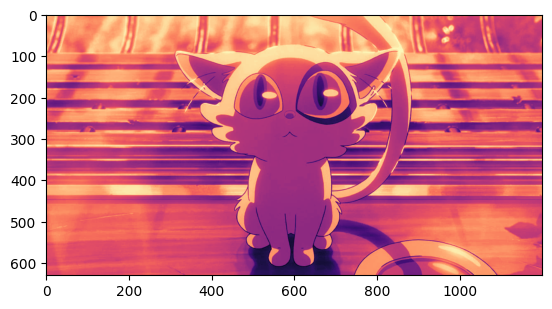

In [128]:
plt.imshow(img_gray, cmap='magma')

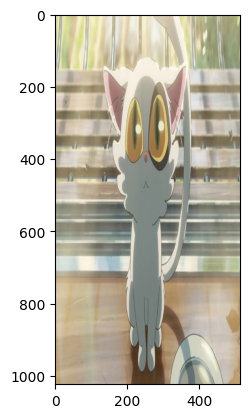

In [129]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

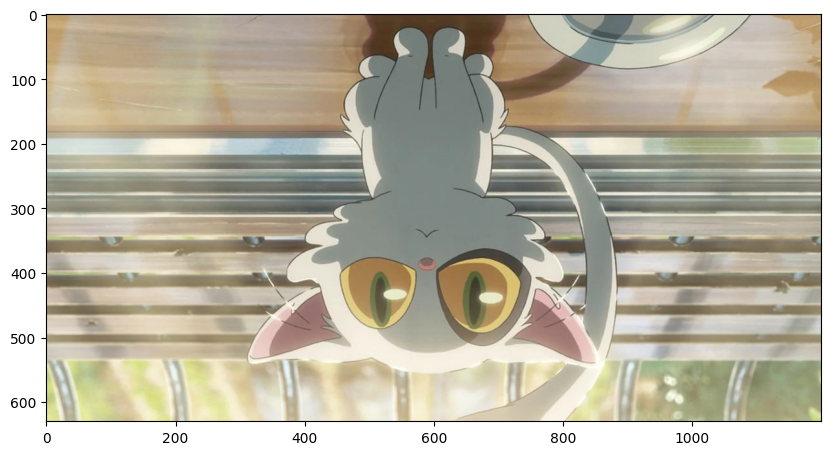

In [130]:
img5 = cv.flip(cv.cvtColor(img,cv.COLOR_BGR2RGB),0)
#simpan File image
#cv.imwrite('/content/drive/MyDrive/PCVK_MM/Images/mandrill2.tiff, img5)
#tampilkan plot dengan ukuran canvas yg lebih besar
fig = plt.figure(figsize=(10,10))
#ubah-ubah ukuran (18,10) sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

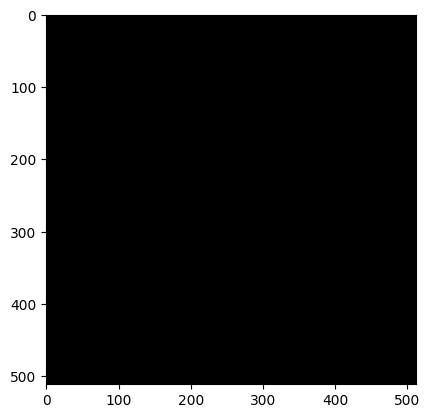

In [131]:
black_img = np.zeros((512,512,3), dtype=np.uint8)
plt.imshow(black_img)

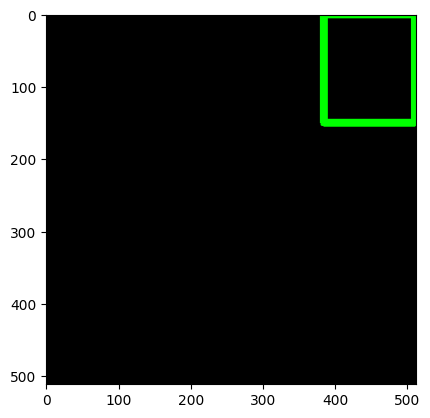

In [132]:
# perhatikan koordinat  titik  pt1 dan  pt 2
cv.rectangle(black_img, (384,0), (510,150), (0,255,0), thickness=10)
plt.imshow(black_img)

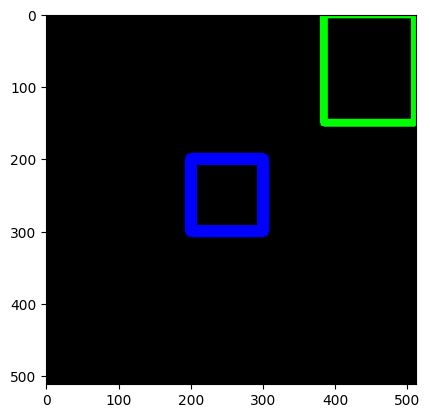

In [133]:
cv.rectangle(black_img,pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=15)
plt.imshow(black_img)

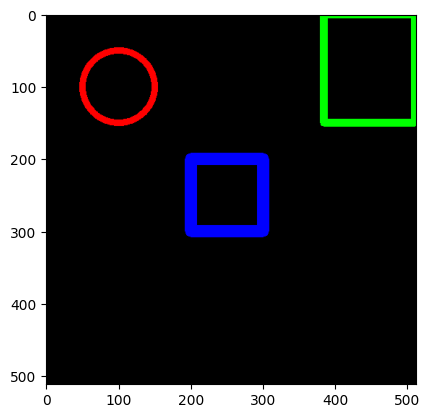

In [134]:
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)
plt.imshow(black_img)

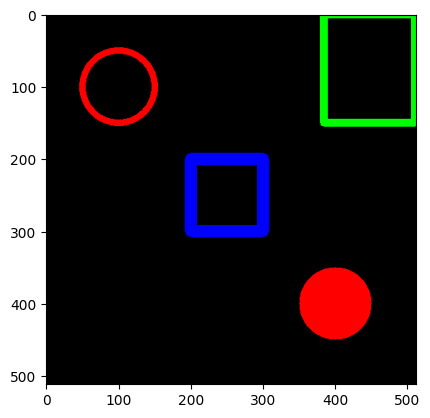

In [135]:
cv.circle(black_img, center=(400,400), radius=50, color=(255,0,0), thickness=-1 )
plt.imshow(black_img)

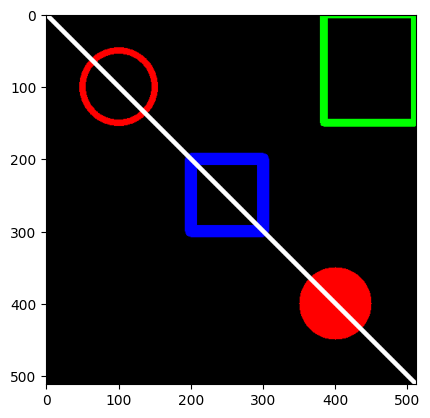

In [136]:
cv.line(black_img, pt1=(0, 0) , pt2=(512, 512) , color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

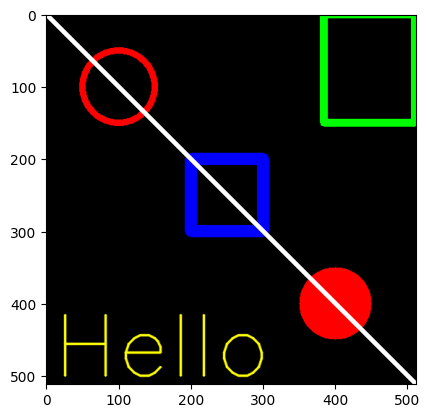

In [137]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, 'Hello', (10,500), fontFace=font, fontScale=4, color=(255,255,0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

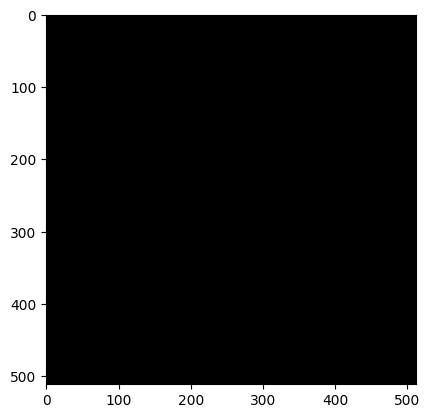

In [138]:
black_img2 = np.zeros((512,512,3), dtype=np.int32)
plt.imshow(black_img2)

In [139]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [140]:
pts = vertices.reshape((-1,1,2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

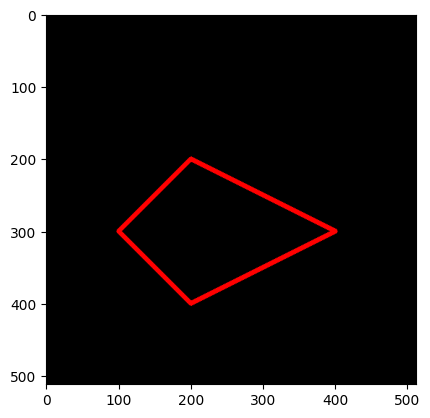

In [141]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(black_img2)

#**Question**

1. What is the difference between the images displayed without and with matplotlib?
* Without matplotlib (using cv2.imshow), images are displayed in BGR format (default OpenCV order). Colors may look “wrong” when displayed in other environments.
* With matplotlib.pyplot.imshow, the library expects RGB format, so you need to convert (cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) to display colors correctly.

So the difference: color interpretation. Without conversion, the colors will look swapped.

2. What is the difference and effect of creating a black image between int16 and int32 data types?
* int16 → values range from −32,768 to 32,767
* int32 → values range from −2,147,483,648 to 2,147,483,647

In practice, since pixel values must be 0–255, both work, but using higher data types (int32) wastes memory. For image processing, usually uint8 (0–255) is the standard.

So the effect: no visible difference for normal images, but memory usage is higher with int32.

3. What is the use of "google.colab.patches import cv2_imshow" in the following code snippet

cv2_imshow is a patched function to display images in Colab notebooks. Use: it replaces cv2.imshow so that images can be displayed inside Colab.

4. What is the use of "skimage import io" in the code snippet for question number 3

skimage.io allows loading images directly from URLs or files. It can read various formats (JPG, PNG, TIFF, etc.) more flexibly than OpenCV.
Use: to easily read images for processing.

#**Task**

1. By using figsize, notice whether the image pixel size also changes?

Changing figsize in plt.figure(figsize=(10,5)) does not change pixel size of the image. It only changes how large the image is displayed on screen. The original resolution stays the same.


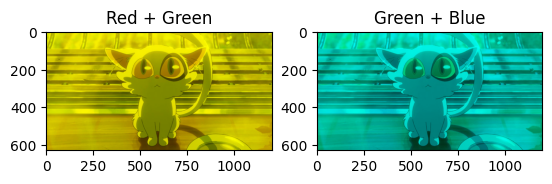

In [142]:
# 2.  Show images in Red-Green and Green-Blue channels only!

# Split channels
B, G, R = cv.split(img)

# Merge only R+G (set B=0)
RG = cv.merge([0*B, G, R])

# Merge only G+B (set R=0)
GB = cv.merge([B, G, 0*R])

# Show results
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(RG, cv.COLOR_BGR2RGB)); plt.title("Red + Green")
plt.subplot(1,2,2); plt.imshow(cv.cvtColor(GB, cv.COLOR_BGR2RGB)); plt.title("Green + Blue")
plt.show()

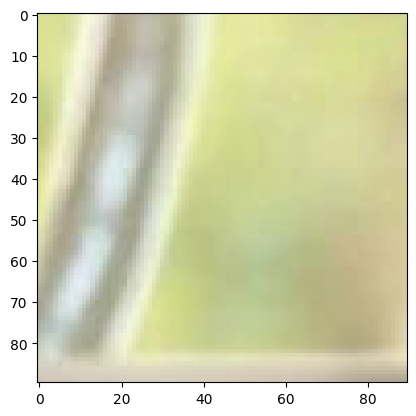

In [143]:
# 3. Show image row 10-100, column 10-100!
crop = img[10:100, 10:100]

plt.imshow(cv.cvtColor(crop, cv.COLOR_BGR2RGB))
plt.show()

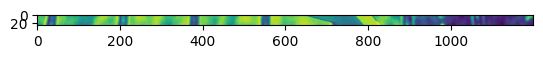

In [144]:
# 4. Show image rows 5-30, all columns, channel Green only!

green_only = img[5:30, :, 1]  # channel 1 = Green
plt.imshow(green_only)
plt.show()

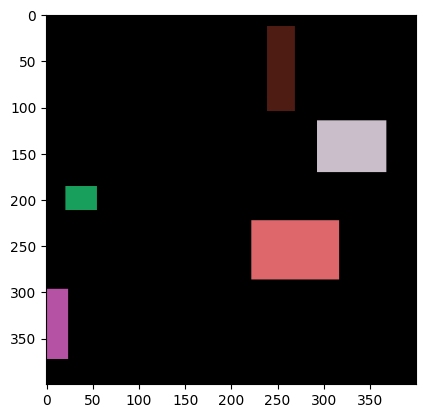

In [145]:
# 5. Create 5 boxes of different sizes and colors in one image. it is recommended to use random numbers!

canvas = np.zeros((400,400,3), dtype=np.uint8)

for i in range(5):
    pt1 = (np.random.randint(0,300), np.random.randint(0,300))
    pt2 = (pt1[0]+np.random.randint(20,100), pt1[1]+np.random.randint(20,100))
    color = tuple(np.random.randint(0,256,3).tolist())
    cv.rectangle(canvas, pt1, pt2, color, -1)

plt.imshow(cv.cvtColor(canvas, cv.COLOR_BGR2RGB))
plt.show()


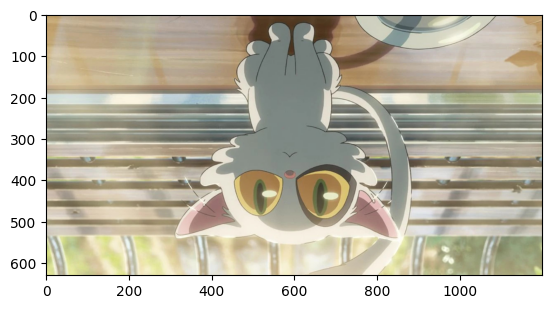

In [146]:
# 6. Show the image upside down!

flip = cv.flip(img, 0)  # flip vertically
plt.imshow(cv.cvtColor(flip, cv.COLOR_BGR2RGB))
plt.show()


In [147]:
# Based on practicum sections 3 and 4, do the following tasks:
# 7. Make rectangles and circles on the face of your photo image when you are active (not a passport photo).


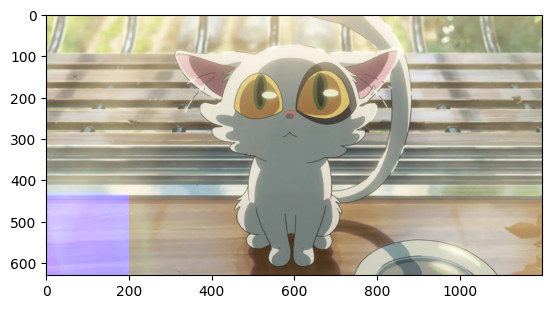

In [148]:
# 8. Create a rectangle in the lower left corner of channel B in the RGB color space from the kitten / lena / mandrill / male / female / couple / sailboat / peppers image !
img_copy = img.copy()

# Split channels
B, G, R = cv.split(img_copy)

# Draw rectangle in Blue channel (B)
cv.rectangle(B, (0, B.shape[0]-200), (200, B.shape[0]), (255), -10)

# Merge back into color image
merged = cv.merge([B, G, R])

# Show in correct colors
plt.imshow(cv.cvtColor(merged, cv.COLOR_BGR2RGB))
plt.show()


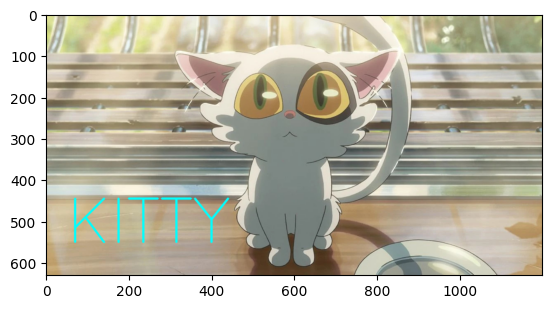

In [149]:
# 9. Complete the writing of the file name on the image file from question no.8. use the font, font size, and font color according to your wishes
cv.putText(img_copy, 'KITTY', (50,550), fontFace=font, fontScale=5, color=(255,255,0), thickness=4, lineType=cv.LINE_AA)


plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
plt.show()


#**Task ID**


Close each specific part of the ID card using the functions you have learned. Get creative with the colors and sizes of the shapes.
- - Group 1 closes the NIK number and name section.
- - Group 2 close the TTL and Gender sections.
- - Group 3 closes the Goals section. Blood and TTD.
- - Group 4 closes the Address and District sections.
- - Group 5 closes the Religion and Marital Status section. Group 6 close Employment and citizenship.
- - Group 7 closes the section valid up to and photos.
- - Group 8 closes the district section and the date the KTP was issued is at the bottom of the photo.
- - Group 9 closes the name of the province and district at the very top of the KTP.
- - Group 10 closes RT/RW and Kel/village sections. Cover using 2 different color boxes.

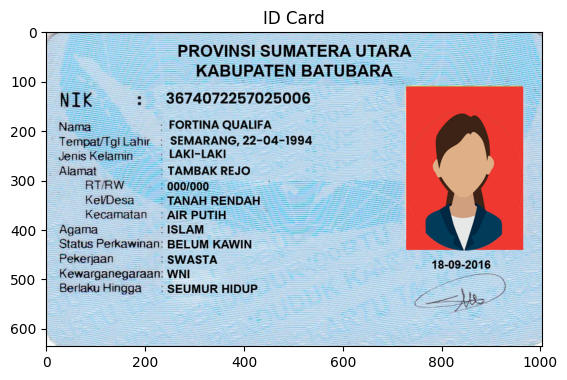

In [152]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load ID card image
id_card = cv.imread('/content/drive/MyDrive/PCVK/Images/id_card.png')

id_copy = id_card.copy()

plt.imshow(cv.cvtColor(id_copy, cv.COLOR_BGR2RGB))
plt.title('ID Card')
plt.show()

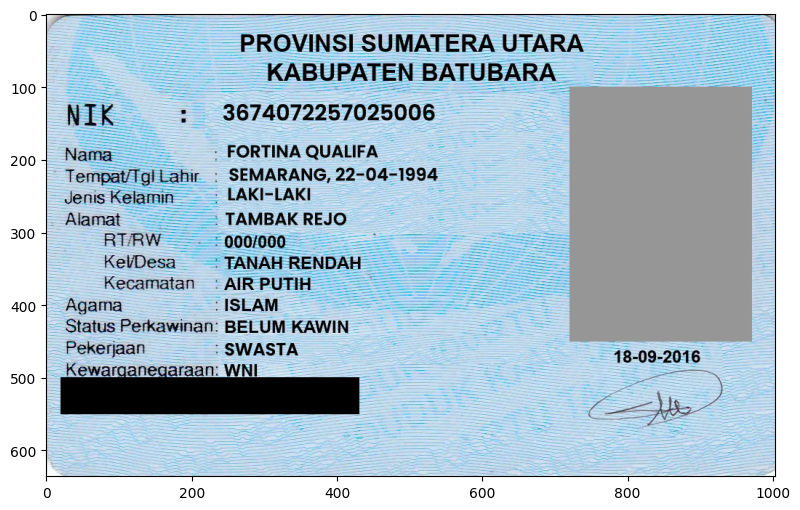

In [156]:
# Group 7 Task
# Close "Berlaku Hingga" section
# ==========================
# Coordinates: (x1,y1) top-left → (x2,y2) bottom-right
# Adjust according to position of text
cv.rectangle(id_copy, (20, 500), (430, 550), (0, 0, 0), -1)   # Black rectangle

# ==========================
# Close the Photo section
# ==========================
cv.rectangle(id_copy, (720, 100), (970, 450), (150, 150, 150), -1)   # Gray rectangle

# Show result using matplotlib (as in practicum)
plt.figure(figsize=(10,6))
plt.imshow(cv.cvtColor(id_copy, cv.COLOR_BGR2RGB))
plt.show()